In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from helpers import load_data_with_columns, date_to_int

In [2]:
DATAFOLDER = '../data/'
character_metadata = load_data_with_columns(DATAFOLDER, 'character.metadata.tsv')
movie_metadata = load_data_with_columns(DATAFOLDER, 'movie.metadata.tsv')

movie_metadata = date_to_int(movie_metadata, 'movie_release_date')

character_metadata = date_to_int(character_metadata, 'movie_release_date')

display(movie_metadata.sample(10))
display(character_metadata.sample(10))


,movie_wikipedia_id,movie_freebase_id,movie_name,movie_release_date,box_office,runtime,languages,countries,genres
15995,28668861,/m/0czcl9r,Death Is a Woman,1967.0,NaN,88.0,[English Language],[United Kingdom],"[Mystery, Drama]"
12640,20438423,/m/04zzv6t,The Sailor from Gibraltar,1967.0,NaN,91.0,[English Language],[United States of America],"[Romantic drama, Romance Film, Drama]"
29571,10565718,/m/02xtxw,Mean Girls,2004.0,129042871.0,97.0,"[Vietnamese Language, German Language, English...","[United States of America, Canada]","[LGBT, Comedy of manners, Comedy-drama, Coming..."
8376,28973039,/m/0dgr_5t,Bodyguard,2011.0,NaN,130.0,"[Hindi Language, English Language]",[India],"[Romance Film, Action, Comedy]"
60084,15361557,/m/03m65g5,Back to the Egg,1981.0,NaN,60.0,[English Language],[United Kingdom],"[Short Film, Musical]"
9176,35432986,/m/0b_mk56,Top Cat,2011.0,15066652.0,90.0,[Spanish Language],"[Mexico, Argentina, United Kingdom]","[Comedy film, Action, Family Film, Animation]"
41132,16071798,/m/03qn9cy,She Couldn't Say No,1954.0,NaN,89.0,[English Language],[United States of America],"[Drama, Comedy, Black-and-white]"
11915,26081701,/m/0b6g_m8,Dagger Eyes,1983.0,NaN,84.0,[Italian Language],"[United States of America, Italy]",[Thriller]
36617,11250843,/m/02r52t0,Netherbeast Incorporated,2007.0,NaN,89.0,[English Language],[United States of America],"[Black comedy, Horror Comedy, Horror, Indie, C..."
14470,157239,/m/014nq4,Star Trek: Insurrection,1998.0,112587658.0,103.0,[English Language],[United States of America],"[Thriller, Science Fiction, Adventure, Drama, ..."


,movie_wikipedia_id,movie_freebase_id,movie_release_date,character_name,actor_birth_date,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age,freebase_map_id,character_freebase_id,actor_freebase_id
119704,4845539,/m/0cqpb0,1993.0,Mollie Ubriacco,1951-01-12,F,1.71,NaN,Kirstie Alley,42.0,/m/02vd40p,/m/0bj8p2h,/m/01wc7p
196468,306195,/m/01sk1v,1995.0,NaN,1938-02-25,F,1.67,NaN,Diane Baker,57.0,/m/0cg203t,NaN,/m/063h4t
70213,23733969,/m/06zs3fv,NaN,Chuck,1961-11-29,M,1.80,/m/06gbnc,Tom Sizemore,NaN,/m/06z_240,/m/0h2pqwb,/m/025j1t
110554,20361883,/m/04zxhjd,2008.0,NaN,NaN,NaN,NaN,NaN,Tongayi Chirisa,NaN,/m/0h9j9jq,NaN,/m/04q381v
300593,26810077,/m/0bmk4r_,2010.0,NaN,1986-02-04,M,1.68,NaN,Asif Ali,24.0,/m/0hnj8v4,NaN,/m/0bmjp9r
438007,18656759,/m/04gh9rs,2007.0,NaN,1950-07-31,M,NaN,NaN,Lane Davies,56.0,/m/0gc1440,NaN,/m/03ft0m
87412,28384803,/m/0crckg3,2010.0,Craig,NaN,NaN,NaN,NaN,Keegan Ridgley,NaN,/m/0g8n8m5,/m/0g8n8kt,/m/0g8n8kq
193046,16167873,/m/03wbrv2,2003.0,NaN,1985-05-05,F,1.63,NaN,Sherin,17.0,/m/04dfxvx,NaN,/m/04cmyj
417941,4131838,/m/0bkvmt,1955.0,James 'Jim' Carmody,1899-12-25,M,1.74,/m/07mqps,Humphrey Bogart,NaN,/m/02tb5d2,/m/0gz4vf_,/m/03n6r
315224,1246480,/m/04ltx7,1987.0,NaN,1936-02-12,M,1.89,NaN,Joe Don Baker,51.0,/m/0j_xcm,NaN,/m/03tl1k


In [3]:
movie_metadata = movie_metadata[movie_metadata['movie_release_date'] > 1850]

In [4]:
def release_by_genre(data, genre='Silent film'):

    genre_films = data[data['genres'].apply(lambda x: np.isin(genre, x))]

    films_by_year = data[movie_metadata['movie_release_date'].isin(genre_films['movie_release_date'])].groupby(by = 'movie_release_date').apply(lambda x: pd.Series({'total_nb_films': x['movie_wikipedia_id'].count()}))

    genre_films_by_year = genre_films.groupby(by = 'movie_release_date').apply(lambda x: pd.Series({'frequency': x['movie_wikipedia_id'].count()}))

    genre_films_by_year = pd.concat((genre_films_by_year, films_by_year), axis = 1)

    return genre_films, genre_films_by_year

def plot_release_by_genre(genre_films_by_year, genre = 'Silent film'):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.plot(genre_films_by_year.index, genre_films_by_year.frequency, color = color)
    ax1.set_xlabel('Release year')
    ax1.set_ylabel('number of movies released', color = color)
    ax1.tick_params(axis='y', labelcolor=color)
    if genre == None:
        ax1.set_title('Genre films released over the years')
    else:
        ax1.set_title('{} films released over the years'.format(genre))

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.plot(genre_films_by_year.index, genre_films_by_year.frequency/genre_films_by_year.total_nb_films, ls = '-.', color = color)
    ax2.set_ylabel('proportion of silent movies released', color = color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_yticks(ticks = np.arange(0, 1.2, 0.2), labels = [str(int(p*100))+'%' for p in np.arange(0, 1.2, 0.2)])

    fig.show()

def select_non_genre(genre, total):
    res = []
    for y in total:
        if ~np.isin(y, genre):
             res.append(y)
    return np.asarray(res)


def actors_by_genre(data_character, genre_films, genre = 'Silent', plot_samples = False, nb_samples=15):

    if genre == 'Silent':
        date = 1940
    elif genre == 'Black-and-white':
        date = 10**(12)

    #only movies that are silent and released before 1940
    data_character_filt = data_character[data_character['movie_wikipedia_id'].isin(genre_films['movie_wikipedia_id'])]
    data_character_filt = data_character_filt[data_character_filt['movie_release_date'] < date]

    #only actors that appear in silent movies and before 1940, but appearances are limited to silent movies
    characters_by_actor = data_character_filt.groupby(by = 'actor_name').apply(lambda x: pd.Series({'genre_appearances' : x['movie_release_date'].values}))

    #only movies that feature an actor that has played at least once in a silent movie
    movies_genre_actors = data_character[data_character['actor_name'].isin(characters_by_actor.index)]
    #only actors that appear in silent movies, but appearances are not limited to silent movies
    characters_by_actor_all = movies_genre_actors.groupby(by = 'actor_name').apply(lambda x: pd.Series({'total_appearances' : x['movie_release_date'].values}))

    characters_by_actor = pd.concat((characters_by_actor, characters_by_actor_all), axis = 1)

    characters_by_actor['non_genre_appearances'] = characters_by_actor.apply(lambda x: select_non_genre(x['genre_appearances'], x['total_appearances']), axis = 1)

    #Add columns indicating the number of appearances
    characters_by_actor['nb_genre_appearances'] = characters_by_actor['genre_appearances'].apply(lambda x: x.shape[0])
    characters_by_actor['nb_total_appearances'] = characters_by_actor['total_appearances'].apply(lambda x: x.shape[0])
    characters_by_actor['nb_non_genre_appearances'] = characters_by_actor['non_genre_appearances'].apply(lambda x: x.shape[0])

    if plot_samples:

        # Keep actors who appear at least in 5 silent movies
        characters_by_actor_filt = characters_by_actor[characters_by_actor['nb_genre_appearances'] >= 5]
        years = [int(movies_genre_actors.movie_release_date.min()), int(movies_genre_actors.movie_release_date.max())]
        sample = characters_by_actor_filt.sample(nb_samples)

        fig, axes = plt.subplots(nb_samples, figsize = (7, 2*nb_samples), sharex = True)

        for i in range(nb_samples):

            axes[i].hist(sample.non_genre_appearances[i], bins = round((years[1]-years[0])/5), range=years, alpha = 0.5, label = 'non-{} films'.format(genre),)
            axes[i].hist(sample.genre_appearances[i], bins = round((years[1]-years[0])/5), range=years, alpha = 0.5, label = '{} films'.format(genre))
            axes[i].set_title(sample.index[i])
            axes[i].legend()
        fig.show()
    
    return characters_by_actor

    
def plot_distrib_actors_by_genre(characters_by_actor, genre = 'Silent'):

    plt.figure()

    plt.hist(characters_by_actor.nb_total_appearances, label = 'All films', bins = 100, range = (0, 100), histtype= 'step')
    plt.hist(characters_by_actor.nb_genre_appearances, label = '{} films'.format(genre), bins = 100, range = (0, 100), histtype= 'step')

    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Number of movies released per actor')
    plt.ylabel('Number of actors')
    plt.title('Distribution of number of movies released by an actor that has appeared in at least one {} film'.format(genre))
    plt.legend()
    plt.show()

    

/var/folders/vf/crff2gv97cs_b8t0fhjvy6800000gn/T/ipykernel_2752/2523207746.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/vf/crff2gv97cs_b8t0fhjvy6800000gn/T/ipykernel_2752/2523207746.py:86: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


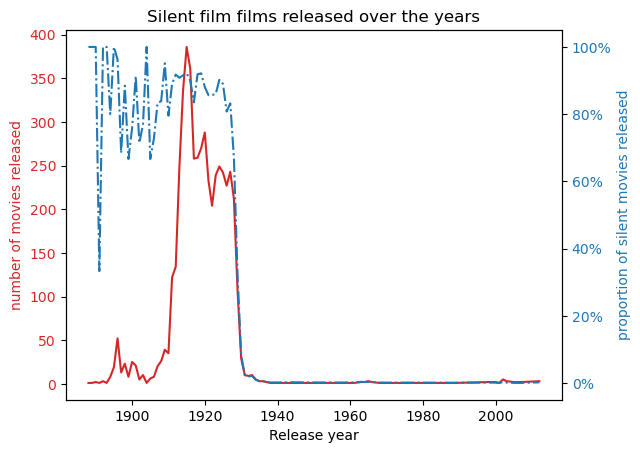

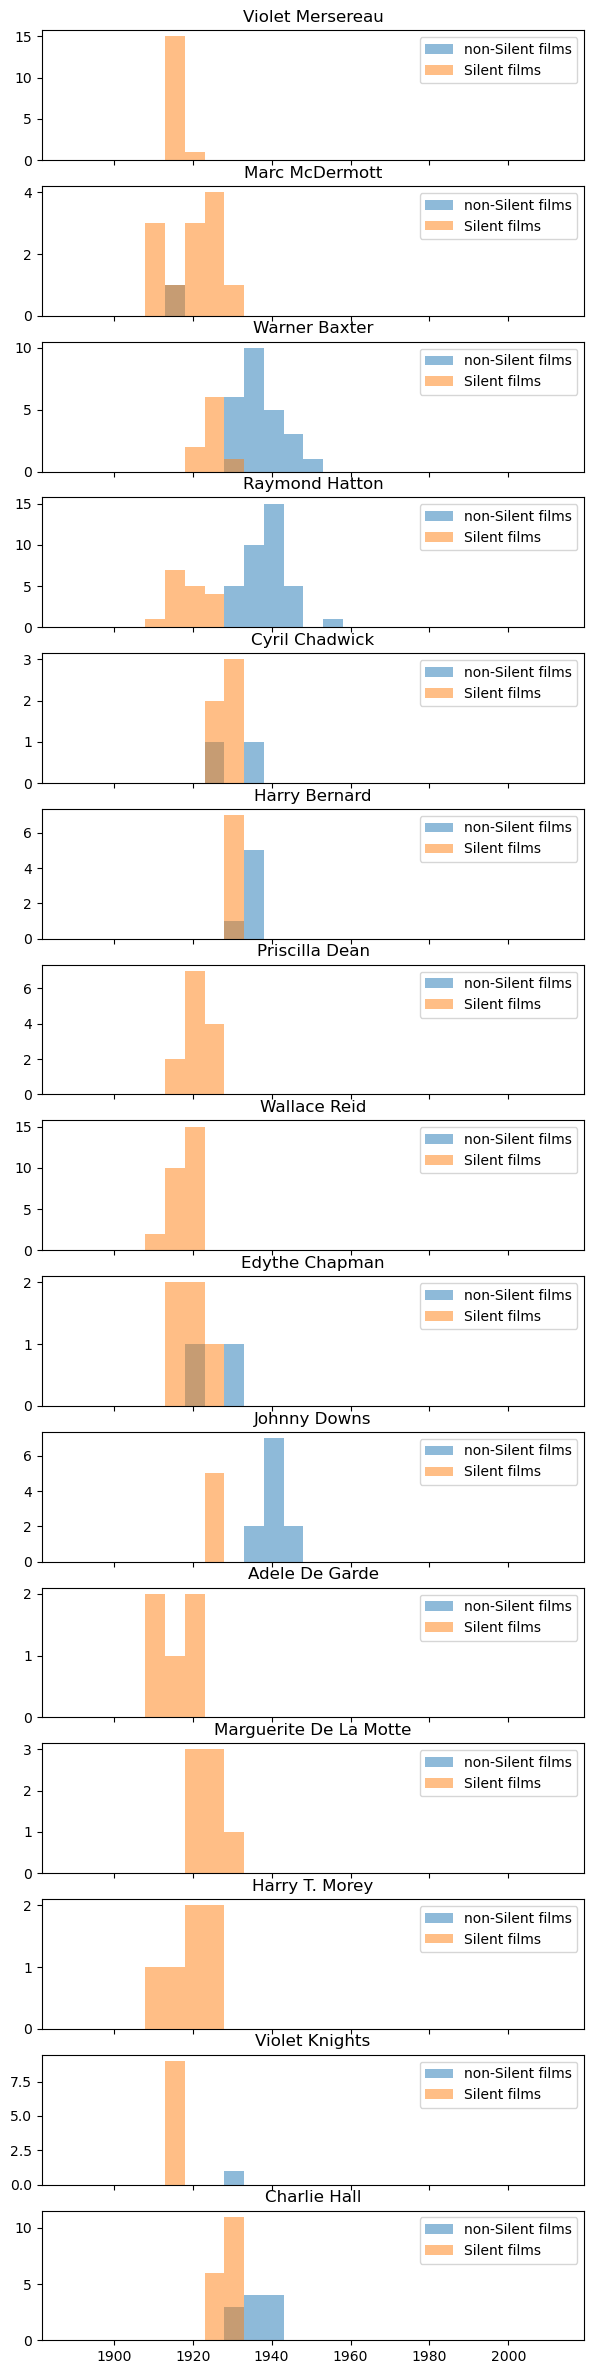

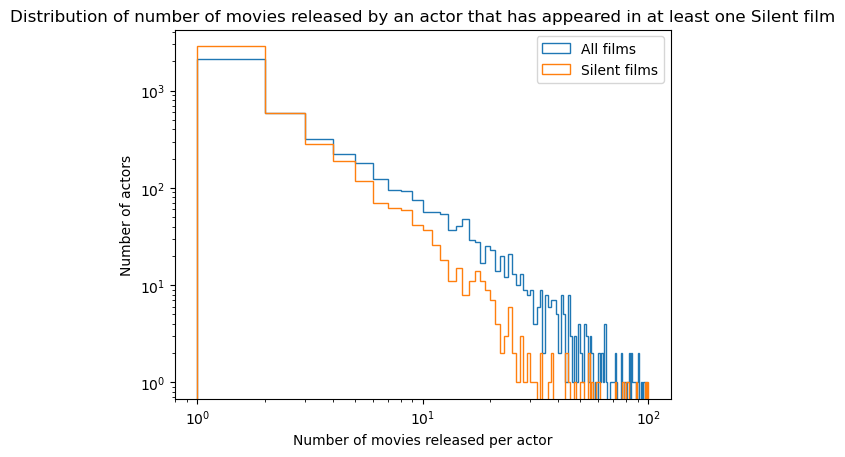

In [5]:
mute_films, mute_films_by_year = release_by_genre(movie_metadata)
plot_release_by_genre(mute_films_by_year)

actors_silent = actors_by_genre(character_metadata, mute_films, plot_samples=True)
plot_distrib_actors_by_genre(actors_silent)

In [6]:
display(actors_silent)

,genre_appearances,total_appearances,non_genre_appearances,nb_genre_appearances,nb_total_appearances,nb_non_genre_appearances
actor_name,,,,,,
Cesarine Prinz\t,[1922.0],"[1926.0, 1922.0]",[1926.0],1,2,1
'Big Bill' Giddinger,[1911.0],[1911.0],[],1,1,0
A. Arnold,[1929.0],[1929.0],[],1,1,0
A. B. Imeson,[1923.0],[1923.0],[],1,1,0
A. Bromley Davenport,[1923.0],"[1923.0, 1933.0, 1938.0, 1931.0, 1932.0]","[1933.0, 1938.0, 1931.0, 1932.0]",1,5,4
...,...,...,...,...,...,...
Zoltán Szerémy,"[1917.0, 1918.0]","[1917.0, 1918.0]",[],2,2,0
rambaldo de goudron,[1915.0],[1915.0],[],1,1,0
Ángela Henao,[1925.0],[1925.0],[],1,1,0


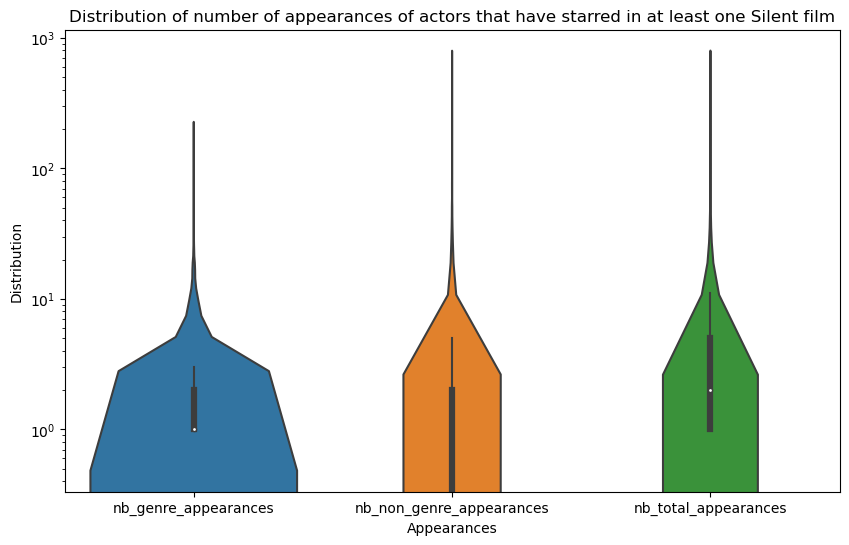

In [7]:
#Create dataframe suitable to plot violin plot for each column
df = pd.melt(actors_silent[['nb_genre_appearances', 'nb_non_genre_appearances', 'nb_total_appearances']], var_name='Appearances', value_name='Distribution')

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.violinplot(x='Appearances', y='Distribution', data=df)
plt.title('Distribution of number of appearances of actors that have starred in at least one Silent film')
plt.yscale('log')
plt.show()


In [8]:
# Create a new Dataframe containing the number of appearances of eah actor per year (1888-2015)

def test(x):
    years = []
    for year in x:
        if ~np.isin(year, years):
            years.append(year)
    return years

def test_count(x, range):
    years_appearance = test(x)
    count = []
    for year in range:
        if np.isin(year, years_appearance):
            count.append(x.tolist().count(year))
        else:
            count.append(0)
    return np.asarray(count)

years = range(int(movie_metadata.movie_release_date.min()), int(movie_metadata.movie_release_date.max()))

new_df = pd.DataFrame({'count_silent' : actors_silent['genre_appearances'].apply(lambda x : test_count(x, years)),
                       'count_non_silent' : actors_silent['non_genre_appearances'].apply(lambda x : test_count(x, years))})


In [9]:
display(new_df)

,count_silent,count_non_silent
actor_name,,
Cesarine Prinz\t,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
'Big Bill' Giddinger,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
A. Arnold,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
A. B. Imeson,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
A. Bromley Davenport,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
Zoltán Szerémy,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
rambaldo de goudron,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
Ángela Henao,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


Text(0.5, 1.0, 'Mean number of appearances across actors that have starred in at least one Silent film')

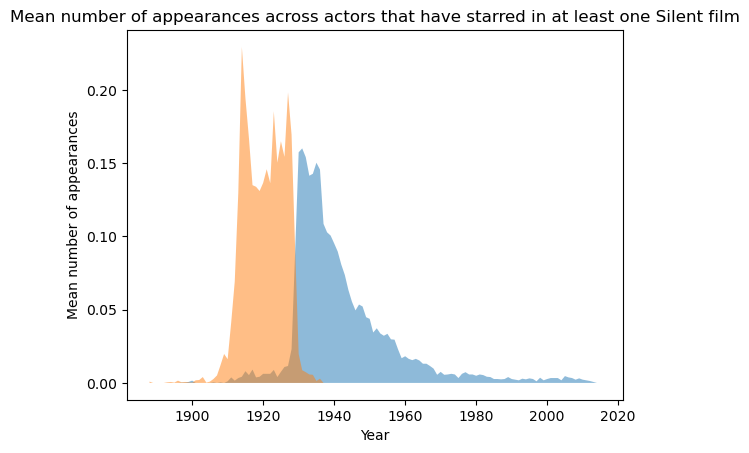

In [10]:
#Plot the mean of appearances of actors (that have starred in at least one Silent film) per year

mean_silent_years = np.mean(np.stack(new_df.count_silent.values), axis = 0)
mean_non_silent_years = np.mean(np.stack(new_df.count_non_silent.values), axis = 0)

plt.fill_between(years, mean_non_silent_years, alpha = 0.5, label = 'Non-Silent films')
plt.fill_between(years, mean_silent_years, alpha = 0.5, label = 'Silent films')
plt.ylabel('Mean number of appearances')
plt.xlabel('Year')
plt.title('Mean number of appearances across actors that have starred in at least one Silent film')


### Note: I am not sure I should use the mean since the distribution is heavy-tailed. But if I use the median, I get 0.... bc a lot of datapoints are zero

/var/folders/vf/crff2gv97cs_b8t0fhjvy6800000gn/T/ipykernel_2752/2523207746.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/vf/crff2gv97cs_b8t0fhjvy6800000gn/T/ipykernel_2752/2523207746.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


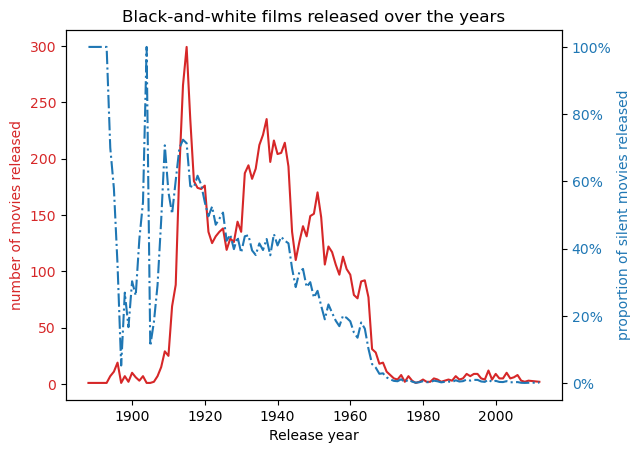

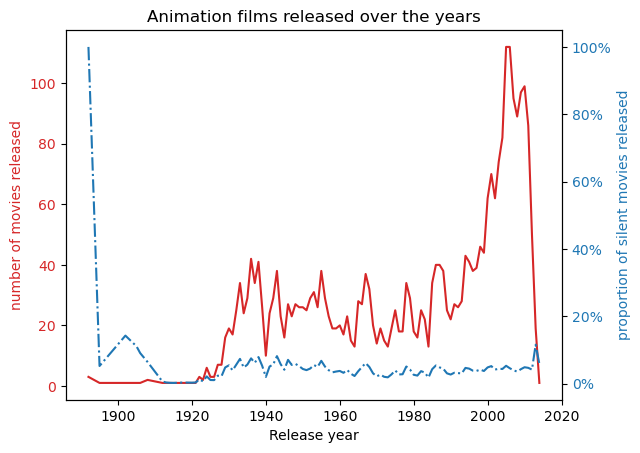

In [14]:
bw_films, bw_films_by_year = release_by_genre(movie_metadata, 'Black-and-white')
plot_release_by_genre(bw_films_by_year, 'Black-and-white')

anim_films, anim_films_by_year = release_by_genre(movie_metadata, 'Animation')
plot_release_by_genre(anim_films_by_year, 'Animation')